**Import libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split

**Read preprocessed dataset**

In [2]:
df_encoded = pd.read_csv('/content/drive/MyDrive/college/preprocessed_uber.csv')

**Split data into Training & Testing sets**

In [3]:
#define Features and Target
#drop non-numeric columns that cannot be used in Linear Regression
X = df_encoded.drop(['fare_amount', 'key', 'pickup_datetime'], axis=1, errors='ignore')
y = df_encoded['fare_amount']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear Regression Model and Evaluation**

In [ ]:
#initialize model
model = LinearRegression()

#train model
model.fit(X_train, y_train)

#predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#evaluation (r square, mse, mae)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train R²: 0.8785261401364907
Test R²: 0.8808931232835743
Train MSE: 11.878244735350885
Test MSE: 11.801575603437787
Train MAE: 1.6667658771062739
Test MAE: 1.6888130310746639


The Linear Regression model achieved a training R² of 0.8785 and a testing R² of 0.8809, indicates strong predictive performance and excellent generalization.

The Mean Absolute Error (MAE) of approx. $1.69 suggests that predictions deviate minimally from actual fares.

The similar training and testing metrics confirms that the model does not suffer from overfitting.

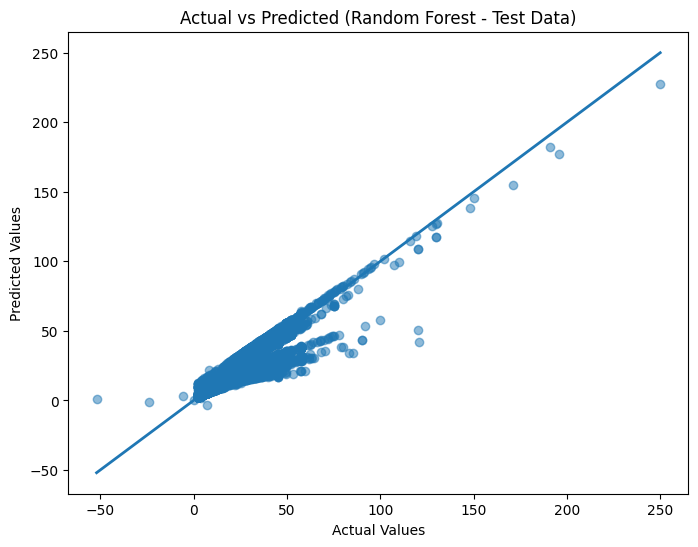

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

#scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.5)

#prediction model line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linewidth=2
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest - Test Data)")

plt.show()

Most points lie close to the diagonal line i.e. model’s predictions are mostly accurate.

Prediction errors increase for higher fares.

A few points are far from the line, model makes some mistakes, especially for large values.

**Random Forest Regressor and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#initialize model
model_rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

#train model
model_rf.fit(X_train, y_train)

#predictions
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

#evaluation
print("----- Random Forest Regression -----")

print("Train R²:", r2_score(y_train, y_train_pred_rf))
print("Test R²:", r2_score(y_test, y_test_pred_rf))

print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_rf))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))

----- Random Forest Regression -----
Train R²: 0.9980887657729886
Test R²: 0.9972073137678049
Train MSE: 0.1868888328775361
Test MSE: 0.27671028419625
Train MAE: 0.00933049663122522
Test MAE: 0.021997912500016776


Train R² = 0.998 and Test R² = 0.997 indicate the model fits and generalizes the data well.

Train MSE = 0.187 and Test MSE = 0.277 show low squared error on both sets.

Train MAE = 0.009 and Test MAE = 0.022 suggests that the average prediction error is small.

*Fine-tuning of random forest regressor is not required.*

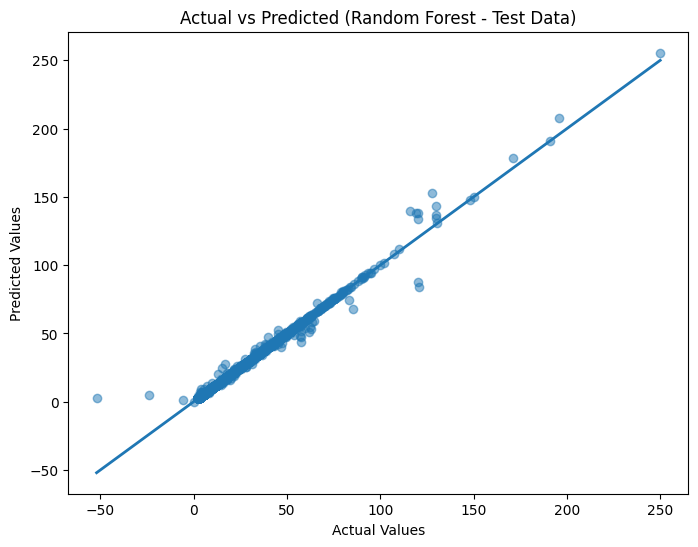

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

#scatter plot
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)

#prediction model line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linewidth=2
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest - Test Data)")

plt.show()

Most points lie close to the diagonal line, Random Forest model predicts very accurately.

The prediction errors are low.

Few points are slightly away from the line i.e. minor errors for some higher values.

The Random Forest model performs and predicts fare amounts more accurately than a basic linear regression model.

Random Forest Regressor performs better than Simple Linear Regressor.

**Predict a test sample for Random Forest Regressor**

In [6]:
#predict 1st test sample
test_sample = X_test.iloc[[0]]

prediction = model_rf.predict(test_sample)

print("Predicted fare:", prediction[0])
print("Actual fare:", y_test.iloc[0])

Predicted fare: 6.5
Actual fare: 6.5


**Hyperparameter Tuning**

Fine‑tuned hyperparameters using GridSearchCV.

Regularized models (Ridge/Lasso) provided better generalization compared to simple Linear Regression.

In [20]:
#define Features and Target
X = df_encoded.drop(['fare_amount', 'key', 'pickup_datetime'], axis=1, errors='ignore')
y = df_encoded['fare_amount']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Ridge Model
ridge = Ridge()

#define Hyperparameter Grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

#Grid Search
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='r2',      # optimize for R²
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

#Best Model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

#Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Evaluation (R square, MSE, MAE)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

Best Parameters: {'alpha': 10, 'fit_intercept': True}
Train R²: 0.8785245841950079
Test R²: 0.8808908514217777
Train MSE: 11.878396882106957
Test MSE: 11.801800708398074
Train MAE: 1.6658314107596093
Test MAE: 1.6878117623484028


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.14254e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Best parameters are alpha = 10 and fit_intercept = True.

Train R² = 0.879 and Test R² = 0.881 show similar result with simple Linear Regression.

MSE and MAE results are also shows show similar result with simple Linear Regression.